# **Оптимальные портфели инвестиций**

Стрежнева В., Родионцева И., Спасюк М.

## 1. Портфели с минимальным риском

Для анализа нами были взяты акции из двух индексов: **DAX и TecDAX.**

DAX — важнейший фондовый индекс Германии. Индекс вычисляется как среднее взвешенное по капитализации значение цен акций крупнейших акционерных компаний Германии.
Также индекс DAX значительно влияет на динамику развития Европейской валюты.
В него входит 40 компаний, таких как BMW, Adidas, Airbus, Bayer и т.д.

Еще 10 акций взяты из индекса TecDEX- немецкий фондовый индекс, отслеживающий показатели 30 крупнейших компаний Германии из технологического сектора.

### Сбор данных

Сначала мы скачали данные по дневным ценам акций с помощью библиотеки Yahoo finance, предварительно составив файл с их тикерами. Временной диапазон получился 255 дней.

In [2]:
#подключаем нужные библиотеки для скачивания информации по ценам акций
import yfinance as yf
import pandas as pd
import datetime

In [3]:
#считываем тикеры из текстового файла
file = "Tickers_2.txt"
tickers = open(file).read().split('\n')

start = datetime.datetime(2016, 1, 1) #устанавливаем временной диапазон
end = datetime.datetime(2016, 12, 31) 
print(tickers)

['1COV.DE', 'ADS.DE', 'AIR.DE', 'AIXA.DE', 'ALV.DE', 'AOF.DE', 'BAS.DE', 'BAYN.DE', 'BC8.DE', 'BEI.DE', 'BMW.DE', 'BNR.DE', 'COK.DE', 'CON.DE', 'COP.DE', 'DB1.DE', 'DBK.DE', 'DTE.DE', 'EKT.DE', 'EOAN.DE', 'EUZ.DE', 'EVT.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 'HEN3.DE', 'HNR1.DE', 'IFX.DE', 'KTN.DE', 'LIN.DE', 'MBG.DE', 'MRK.DE', 'MTX.DE', 'MUV2.DE', 'NDX1.DE', 'NEM.DE', 'PAH3.DE', 'PNE3.DE', 'PUM.DE', 'RWE.DE', 'S92.DE', 'SAP.DE', 'SIE.DE', 'SMHN.DE', 'SRT3.DE', 'SY1.DE', 'VNA.DE', 'VOW3.DE', 'WAF.DE', 'ZAL.DE']


In [4]:
#непосредственно скачиваем скорректированную цену закрытия и записываем информацию в дата фрейм
stock_data = pd.DataFrame() 
for ticker in tickers:
    try:
        temp = pd.DataFrame(yf.download(ticker, start, end)) 
        if not temp.empty:
            stock_data[ticker] = temp["Adj Close"] #в случае, если данные по акции есть, то записываем их в созданную таблицу
    except:
        print("data not found")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
stock_data.to_excel('stock_inf.xlsx', index = False) #записываем в файл excel

In [6]:
stock_data = pd.read_excel("stock_inf.xlsx")

In [7]:
stock_data #полученная информация

,1COV.DE,ADS.DE,AIR.DE,AIXA.DE,ALV.DE,AOF.DE,BAS.DE,BAYN.DE,BC8.DE,BEI.DE,...,S92.DE,SAP.DE,SIE.DE,SMHN.DE,SRT3.DE,SY1.DE,VNA.DE,VOW3.DE,WAF.DE,ZAL.DE
0,25.403833,78.999657,54.283501,3.726195,100.307068,12.976725,41.833328,82.290337,13.335766,75.820099,...,50.785992,60.444416,56.888939,7.629433,55.440540,54.511726,15.940037,72.164726,16.370415,35.084999
1,25.110981,78.728928,55.363995,3.774306,100.628571,13.040832,41.598099,82.438545,13.164337,76.642593,...,53.911278,61.172356,57.248116,7.817451,57.802269,53.986439,16.046862,69.310104,16.982533,33.630001
2,24.880606,77.817459,54.872864,3.729969,100.950058,12.614824,40.904800,81.252914,13.068932,76.147217,...,51.663773,61.703331,57.021973,7.761633,57.549229,53.479279,15.714841,67.882790,16.795912,33.650002
3,24.052816,76.608170,53.712002,3.504511,98.860344,12.925024,39.908176,79.178047,12.627686,74.287231,...,50.776348,61.095287,55.931156,7.820389,54.151218,52.510220,15.420345,65.656197,16.545837,32.990002
4,23.498350,75.308670,52.381485,3.207358,97.606491,13.075989,39.419155,76.992035,12.463709,74.100304,...,49.213699,60.846912,55.545372,7.372866,53.464394,52.220406,15.174937,65.713287,16.355484,33.080002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,53.096107,132.268906,57.619946,2.880962,106.087730,11.256217,56.400192,74.847794,14.577809,76.212082,...,24.434780,71.432243,80.088882,6.169353,68.414841,53.171982,18.232103,78.610527,32.632591,36.070000
251,53.406933,133.230011,57.546757,2.886622,106.020134,11.328426,56.587223,75.014969,14.839369,76.523262,...,24.454130,71.728386,80.471077,6.218316,69.579353,53.328133,18.282766,78.467606,33.136467,35.740002
252,53.797459,134.786133,57.372959,2.924356,105.715965,11.213740,56.754917,74.992165,14.869609,76.400696,...,24.463800,72.050674,80.644798,6.188938,70.016045,53.401600,18.133760,78.095985,33.890423,36.360001
253,52.028122,135.426880,57.098534,2.892282,105.378014,11.011977,56.729118,75.022568,14.877167,76.485550,...,24.570208,72.033249,80.714302,6.188938,69.589066,53.318939,18.291706,76.323677,33.345474,36.215000


### Вычисление эффективности и матрицы ковариации

Во всех последующих пунктах мы пользовались библиотекой PyPortfolioOpt, в которой есть функции для вычисления доходностей, матожидания(эффективности), матрицы ковариаций, а также с ее помощью можно находить портфели с разными характеристиками и строить эффективный фронт.

In [8]:
!pip install PyPortfolioOpt #устанавливаем библиотеку

ERROR: Invalid requirement: '#устанавливаем'

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from pypfopt.efficient_frontier import EfficientFrontier #модуль для вычисления эффективного фронта
from pypfopt import risk_models #модуль для вычисления матрицы ковариаций
from pypfopt import expected_returns #модуль для вычисления доходностей
import pypfopt.plotting as pplt #модуль для построения графиков

In [10]:
returns = expected_returns.returns_from_prices(stock_data, log_returns=True) #вычисление доходностей
returns

,1COV.DE,ADS.DE,AIR.DE,AIXA.DE,ALV.DE,AOF.DE,BAS.DE,BAYN.DE,BC8.DE,BEI.DE,...,S92.DE,SAP.DE,SIE.DE,SMHN.DE,SRT3.DE,SY1.DE,VNA.DE,VOW3.DE,WAF.DE,ZAL.DE
1,-0.011595,-0.003433,0.019709,0.012829,0.003200,0.004928,-0.005639,0.001799,-0.012938,0.010790,...,0.059719,0.011971,0.006294,0.024345,0.041717,-0.009683,0.006679,-0.040361,0.036710,-0.042355
2,-0.009217,-0.011645,-0.008911,-0.011816,0.003190,-0.033213,-0.016807,-0.014486,-0.007274,-0.006484,...,-0.042583,0.008643,-0.003958,-0.007166,-0.004387,-0.009439,-0.020908,-0.020808,-0.011050,0.000595
3,-0.033837,-0.015662,-0.021382,-0.062349,-0.020918,0.024293,-0.024666,-0.025868,-0.034346,-0.024729,...,-0.017326,-0.009903,-0.019315,0.007542,-0.060860,-0.018286,-0.018918,-0.033351,-0.015001,-0.019809
4,-0.023322,-0.017108,-0.025083,-0.088603,-0.012764,0.011612,-0.012329,-0.027997,-0.013071,-0.002519,...,-0.031259,-0.004074,-0.006921,-0.058928,-0.012765,-0.005534,-0.016043,0.000869,-0.011571,0.002724
5,0.005964,0.021458,-0.010970,-0.028642,0.003945,0.015069,-0.006775,-0.010643,-0.008890,-0.008869,...,-0.033989,0.007711,-0.006487,-0.021616,-0.039068,-0.008709,0.003988,0.016800,-0.042183,-0.001513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.006022,-0.002764,0.004774,-0.011071,-0.002228,-0.017395,-0.004108,-0.003041,0.010740,0.001858,...,0.004563,-0.003530,0.002172,-0.001586,0.005690,-0.006543,0.007547,-0.009410,-0.004451,-0.006632
251,0.005837,0.007240,-0.001271,0.001963,-0.000637,0.006395,0.003311,0.002231,0.017783,0.004075,...,0.000792,0.004137,0.004761,0.007905,0.016878,0.002932,0.002775,-0.001820,0.015323,-0.009191
252,0.007286,0.011612,-0.003025,0.012987,-0.002873,-0.010175,0.002959,-0.000304,0.002036,-0.001603,...,0.000395,0.004483,0.002156,-0.004736,0.006257,0.001377,-0.008183,-0.004747,0.022498,0.017199
253,-0.033442,0.004743,-0.004795,-0.011028,-0.003202,-0.018156,-0.000455,0.000405,0.000508,0.001110,...,0.004340,-0.000242,0.000861,0.000000,-0.006117,-0.001549,0.008672,-0.022955,-0.016210,-0.003996


Стоит отметить, что вычисленная ниже эффективность представляет собой ожидаемую **годовую** доходность, а также ковариационная матрица - **годовая** ковариационная матрица.

In [11]:
#Вычисление эффективности для каждого актива. Функция принимает на вход доходности за 255 дней
mu = expected_returns.mean_historical_return(returns, returns_data=True, frequency=255)
mu

1COV.DE    0.943099
ADS.DE     0.690580
AIR.DE     0.012360
AIXA.DE   -0.319452
ALV.DE     0.021655
AOF.DE    -0.210170
BAS.DE     0.328130
BAYN.DE   -0.115489
BC8.DE     0.093237
BEI.DE    -0.017243
BMW.DE    -0.041144
BNR.DE     0.088144
COK.DE    -0.016217
CON.DE    -0.163146
COP.DE     0.144749
DB1.DE    -0.025613
DBK.DE    -0.298084
DTE.DE     0.029657
EKT.DE     0.263986
EOAN.DE   -0.129142
EUZ.DE     0.399173
EVT.DE     0.761915
FME.DE     0.057875
FRE.DE     0.158926
HEI.DE     0.167372
HEN3.DE    0.140325
HNR1.DE   -0.016845
IFX.DE     0.225873
KTN.DE     0.413771
LIN.DE     0.040447
MBG.DE    -0.014331
MRK.DE     0.136317
MTX.DE     0.237538
MUV2.DE    0.032417
NDX1.DE   -0.437287
NEM.DE     0.177020
PAH3.DE    0.028866
PNE3.DE    0.035211
PUM.DE     0.258479
RWE.DE    -0.011710
S92.DE    -0.580982
SAP.DE     0.168671
SIE.DE     0.386675
SMHN.DE   -0.250373
SRT3.DE    0.164511
SY1.DE    -0.051331
VNA.DE     0.122342
VOW3.DE   -0.017764
WAF.DE     0.774350
ZAL.DE    -0.043729


In [12]:
#Вычисление матрицы ковариации по доходности за 255 дней
Covv = risk_models.sample_cov(returns, returns_data=True, frequency=255)
Covv

,1COV.DE,ADS.DE,AIR.DE,AIXA.DE,ALV.DE,AOF.DE,BAS.DE,BAYN.DE,BC8.DE,BEI.DE,...,S92.DE,SAP.DE,SIE.DE,SMHN.DE,SRT3.DE,SY1.DE,VNA.DE,VOW3.DE,WAF.DE,ZAL.DE
1COV.DE,0.106013,0.026262,0.043424,0.044817,0.044160,0.031932,0.042783,0.040411,0.030434,0.022031,...,0.036060,0.029021,0.035823,0.046342,0.044836,0.033729,0.024966,0.068762,0.028356,0.046206
ADS.DE,0.026262,0.060908,0.023443,0.026887,0.021695,0.014234,0.020659,0.023243,0.019666,0.015394,...,0.035283,0.024155,0.018897,0.029360,0.034463,0.027194,0.022306,0.030644,0.010654,0.037104
AIR.DE,0.043424,0.023443,0.086332,0.032117,0.049833,0.035293,0.038615,0.037917,0.026437,0.021944,...,0.047279,0.035181,0.042153,0.060822,0.051228,0.026046,0.021033,0.064558,0.035277,0.039038
AIXA.DE,0.044817,0.026887,0.032117,0.284091,0.027753,0.035223,0.038612,0.021643,0.034384,0.013605,...,0.090476,0.023553,0.034029,0.042635,0.063651,0.031219,0.026640,0.054016,0.042110,0.042201
ALV.DE,0.044160,0.021695,0.049833,0.027753,0.069480,0.039932,0.044893,0.043198,0.028368,0.021204,...,0.040550,0.036680,0.046675,0.048958,0.041079,0.024724,0.019507,0.069085,0.031849,0.037562
AOF.DE,0.031932,0.014234,0.035293,0.035223,0.039932,0.166735,0.031902,0.025173,0.022504,0.017614,...,0.029827,0.029533,0.030580,0.030337,0.041798,0.022487,0.019322,0.053759,0.021671,0.043549
BAS.DE,0.042783,0.020659,0.038615,0.038612,0.044893,0.031902,0.051732,0.038598,0.024635,0.019553,...,0.038943,0.029234,0.041315,0.042126,0.035799,0.023245,0.018536,0.062245,0.034299,0.033976
BAYN.DE,0.040411,0.023243,0.037917,0.021643,0.043198,0.025173,0.038598,0.067360,0.025098,0.024351,...,0.037089,0.029782,0.037629,0.038404,0.034632,0.026864,0.025865,0.054741,0.019983,0.036075
BC8.DE,0.030434,0.019666,0.026437,0.034384,0.028368,0.022504,0.024635,0.025098,0.050126,0.021359,...,0.040949,0.027718,0.026261,0.036568,0.034838,0.027149,0.026485,0.043266,0.020686,0.033726
BEI.DE,0.022031,0.015394,0.021944,0.013605,0.021204,0.017614,0.019553,0.024351,0.021359,0.039840,...,0.027942,0.023206,0.019493,0.022355,0.034442,0.026147,0.024444,0.027979,0.004668,0.024394


### Определение портфелей с минимальным риском

Инициализируем объект класса EfficientFrontier, передаем эффективность, матрицу ковариации, а также возможные значения весов(если разрешены короткие продажи, они могут изменяться от -1 до 1, если запрещены, то от 0 до 1).

Далее вычисляем портфель с минимальным риском с разрешением коротких продаж.

In [13]:
#Считаем портфель с минимальной волатильностью(минимальным риском) с разрешением коротких продаж
ef = EfficientFrontier(mu, Covv, weight_bounds=(-1,1)) #инициализация
sharpe_pfolio=ef.min_volatility() #вычисление портфеля с минимальным риском
sharpe_pwt=ef.clean_weights() #метод, который округляет небольшие веса до нуля, а остальные — до ближайшего целого числа
print(sharpe_pwt) #выводим полученный портфель

OrderedDict([('1COV.DE', -0.0039), ('ADS.DE', 0.01044), ('AIR.DE', -0.00217), ('AIXA.DE', -0.00146), ('ALV.DE', -0.00133), ('AOF.DE', 0.00033), ('BAS.DE', 0.0156), ('BAYN.DE', -0.01279), ('BC8.DE', 0.00983), ('BEI.DE', 0.00364), ('BMW.DE', 0.00994), ('BNR.DE', -0.00512), ('COK.DE', -0.0118), ('CON.DE', -0.02717), ('COP.DE', -0.00258), ('DB1.DE', 0.00681), ('DBK.DE', -0.0051), ('DTE.DE', 0.00986), ('EKT.DE', -0.00223), ('EOAN.DE', -0.00741), ('EUZ.DE', 0.00322), ('EVT.DE', -0.00059), ('FME.DE', 0.02682), ('FRE.DE', -0.03765), ('HEI.DE', 0.00821), ('HEN3.DE', 0.00013), ('HNR1.DE', 0.0), ('IFX.DE', -0.00069), ('KTN.DE', -0.00038), ('LIN.DE', 0.97111), ('MBG.DE', 0.00085), ('MRK.DE', 0.00754), ('MTX.DE', 0.02451), ('MUV2.DE', 0.02218), ('NDX1.DE', 0.00219), ('NEM.DE', -0.00511), ('PAH3.DE', 0.00572), ('PNE3.DE', 0.00556), ('PUM.DE', 0.0064), ('RWE.DE', -0.00392), ('S92.DE', -0.00709), ('SAP.DE', 0.01554), ('SIE.DE', -0.01729), ('SMHN.DE', -0.00094), ('SRT3.DE', -0.00192), ('SY1.DE', 0.0137

In [14]:
info_allowed = ef.portfolio_performance(verbose=True)
info_allowed #выводим ключевую информацию по портфелю

Expected annual return: 5.5%
Annual volatility: 1.6%
Sharpe Ratio: 2.11


(0.054748604629912545, 0.016430167974745828, 2.114926924869135)

Вычисляем портфель с минимальным риском и запретом коротких продаж.

In [15]:
#Считаем портфель с минимальной волатильностью(минимальным риском) с запретом коротких продаж
ef = EfficientFrontier(mu, Covv, weight_bounds=(0,1)) #инициализируем объект класса
sharpe_pfolio=ef.min_volatility() 
sharpe_pwt=ef.clean_weights() 
print(sharpe_pwt)

OrderedDict([('1COV.DE', 0.0), ('ADS.DE', 0.00153), ('AIR.DE', 0.0), ('AIXA.DE', 0.0), ('ALV.DE', 0.0), ('AOF.DE', 0.0009), ('BAS.DE', 0.0), ('BAYN.DE', 0.0), ('BC8.DE', 0.0), ('BEI.DE', 0.0), ('BMW.DE', 0.0), ('BNR.DE', 0.0), ('COK.DE', 0.0), ('CON.DE', 0.0), ('COP.DE', 0.0), ('DB1.DE', 0.0), ('DBK.DE', 0.0), ('DTE.DE', 0.0), ('EKT.DE', 0.0003), ('EOAN.DE', 0.0), ('EUZ.DE', 0.0), ('EVT.DE', 0.0), ('FME.DE', 0.0), ('FRE.DE', 0.0), ('HEI.DE', 0.0), ('HEN3.DE', 0.0), ('HNR1.DE', 0.0), ('IFX.DE', 0.0), ('KTN.DE', 0.0), ('LIN.DE', 0.9777), ('MBG.DE', 0.0), ('MRK.DE', 0.0), ('MTX.DE', 0.00403), ('MUV2.DE', 0.00206), ('NDX1.DE', 0.0), ('NEM.DE', 0.0), ('PAH3.DE', 0.0), ('PNE3.DE', 0.00166), ('PUM.DE', 0.00121), ('RWE.DE', 0.0), ('S92.DE', 0.0), ('SAP.DE', 0.00694), ('SIE.DE', 0.0), ('SMHN.DE', 0.0), ('SRT3.DE', 0.0), ('SY1.DE', 0.00367), ('VNA.DE', 0.0), ('VOW3.DE', 0.0), ('WAF.DE', 0.0), ('ZAL.DE', 0.0)])


In [16]:
info_not_allowed = ef.portfolio_performance(verbose=True)
info_not_allowed #информация по портфелю

Expected annual return: 4.3%
Annual volatility: 1.9%
Sharpe Ratio: 1.18


(0.04287092874603489, 0.019375530367911308, 1.1804027199127654)

Представим эти два портфеля на графике в системе координат (E, $\sigma$)

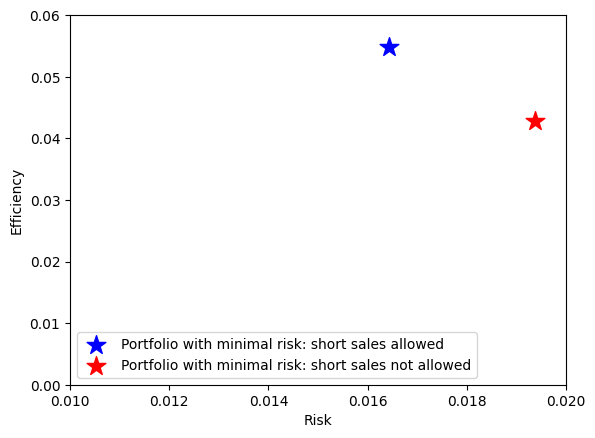

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.scatter(info_allowed[1], info_allowed[0],c='blue', marker='*', s=200)
plt.scatter(info_not_allowed[1], info_not_allowed[0],c='red', marker='*', s=200)
plt.legend(['Portfolio with minimal risk: short sales allowed', 'Portfolio with minimal risk: short sales not allowed'])
plt.xlim(0.01, 0.02)  
plt.ylim(0, 0.06)
plt.xlabel('Risk')
plt.ylabel('Efficiency')
plt.show()

Портфель с разрешением коротких продаж показывает большую доходность и меньший риск, чем с их запретом. Это может быть связано с тем, что количество возможных стратегий в случае с использованием коротких продаж выше, что позволяет лучше диверсифицировать портфель, снижая общий риск.

## 2. Эффективный фронт

Для выбранного набора из 50 активов построим эффективный фронт портфелей инвестиций:

* с разрешением коротких продаж;

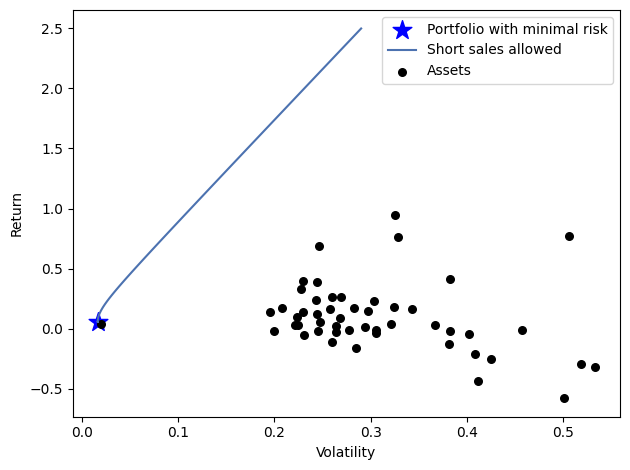

In [18]:
import numpy as np

ef = EfficientFrontier(mu, Covv, weight_bounds=(-1, 1)) #инициализируем объект класса
fig, ax = plt.subplots()
plt.scatter(info_allowed[1], info_allowed[0],c='blue', marker='*', s=200) #отмечаем портфель с минимальным риском
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 2.50, 100)) #строим эффективный фронт
plt.legend(['Portfolio with minimal risk', 'Short sales allowed', 'Assets'])
plt.show()

* с запретом коротких продаж.

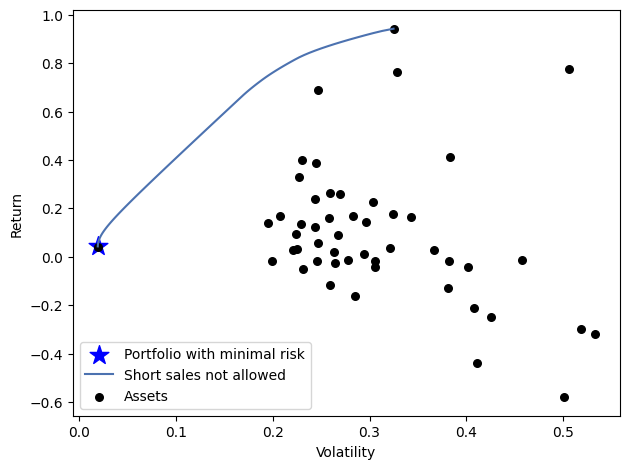

In [19]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(0, 1)) #инициализируем объект класса
fig, ax = plt.subplots()
plt.scatter(info_not_allowed[1], info_not_allowed[0],c='blue', marker='*', s=200) #отмечаем портфель с минимальным риском
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True) #строим эффективный фронт
plt.legend(['Portfolio with minimal risk', 'Short sales not allowed', 'Assets'])
plt.show()

Теперь рассмотрим портфель с равными долями вложения капитала.

In [20]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(1 / 50, 1 / 50)) #инициализируем объект класса
sharpe_pfolio=ef.min_volatility()
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('1COV.DE', 0.02), ('ADS.DE', 0.02), ('AIR.DE', 0.02), ('AIXA.DE', 0.02), ('ALV.DE', 0.02), ('AOF.DE', 0.02), ('BAS.DE', 0.02), ('BAYN.DE', 0.02), ('BC8.DE', 0.02), ('BEI.DE', 0.02), ('BMW.DE', 0.02), ('BNR.DE', 0.02), ('COK.DE', 0.02), ('CON.DE', 0.02), ('COP.DE', 0.02), ('DB1.DE', 0.02), ('DBK.DE', 0.02), ('DTE.DE', 0.02), ('EKT.DE', 0.02), ('EOAN.DE', 0.02), ('EUZ.DE', 0.02), ('EVT.DE', 0.02), ('FME.DE', 0.02), ('FRE.DE', 0.02), ('HEI.DE', 0.02), ('HEN3.DE', 0.02), ('HNR1.DE', 0.02), ('IFX.DE', 0.02), ('KTN.DE', 0.02), ('LIN.DE', 0.02), ('MBG.DE', 0.02), ('MRK.DE', 0.02), ('MTX.DE', 0.02), ('MUV2.DE', 0.02), ('NDX1.DE', 0.02), ('NEM.DE', 0.02), ('PAH3.DE', 0.02), ('PNE3.DE', 0.02), ('PUM.DE', 0.02), ('RWE.DE', 0.02), ('S92.DE', 0.02), ('SAP.DE', 0.02), ('SIE.DE', 0.02), ('SMHN.DE', 0.02), ('SRT3.DE', 0.02), ('SY1.DE', 0.02), ('VNA.DE', 0.02), ('VOW3.DE', 0.02), ('WAF.DE', 0.02), ('ZAL.DE', 0.02)])


In [21]:
info_equal = ef.portfolio_performance(verbose=True)
info_equal #информация по портфелю

Expected annual return: 9.5%
Annual volatility: 19.0%
Sharpe Ratio: 0.40


(0.09487332718332536, 0.18950095102036782, 0.3951079231010185)

Изобразим оба фронта и карту активов в системе координат (E, $\sigma$). Также отметим на ней портфели с минимальным риском и портфель с равными долями.

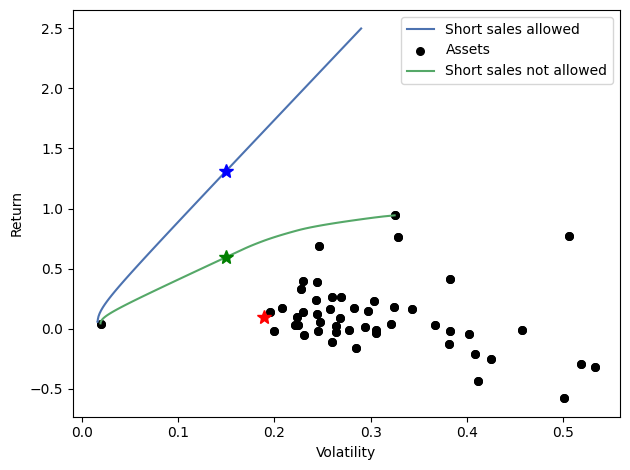

In [69]:
# Cтроим эффективный фронт (короткие продажи разрешены)
ef = EfficientFrontier(mu, Covv, weight_bounds=(-1, 1))
fig, ax = plt.subplots()
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 2.50, 100))

# Cтроим эффективный фронт (короткие продажи запрещены)
ef = EfficientFrontier(mu, Covv, weight_bounds=(0, 1))
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Портфель с минимальным риском с разрешением коротких продаж
plt.plot(info_allowed[1], info_allowed[0], marker='*', color='blue', markersize=10)

# Портфель с минимальным риском с запретом коротких продаж
plt.plot(info_not_allowed[1], info_not_allowed[0], marker='*', color='green', markersize=10)

# Портфель с равными долями
plt.plot(info_equal[1], info_equal[0], marker='*', color='red', markersize=10)

plt.legend(['Short sales allowed', 'Assets', 'Short sales not allowed'])
plt.show()

Как и ожидалось, эффективный фронт с запрещёнными короткими продажами оказался ниже эффективного фронта, в котором короткие продажи разрешены. Что касается портфеля с равными долями, то он лежит довольно далеко от обоих эффективных фронтов и имеет большой риск при маленькой доходности.

## "Хорошие" инвестиционные портфели

Требуется выбрать 10 активов из имеющихся 50 так, чтобы получились "хорошие" инвестиционные портфели. 
Для начала выберем 15 активов с наибольшими значениями доходность/риск. Далее будем брать из этого списка выборку из 10 активов, строить эффективный фронт портфелей и искать ту выборку, для которой этот эффективный фронт лежит ближе к эффективному фронту портфелей из 50 активов.

Расстояние между двумя эффективными фронтами будем искать как расстояние Хаусдорфа. Для этого выберем на каждом эффективном фронте по 5 портфелей с заданными характеристиками. В функцию directed_hausdorff будем подавать координаты выбранных портфелей на одном фронте и на другом, а именно их характеристики  - return и volatility.

1) Для набора из 50 активов найдем эффективный фронт портфелей инвестиций с запретом коротких продаж. Выберем 5 портфелей на этом фронте с заданным уровнями риска: [0.2, 0.25, 0.3, 0.4]

In [23]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(0,1))
c = ef.min_volatility()
n = ef.clean_weights()
info = ef.portfolio_performance()
inf_50 = []
inf_50.append(info)
target_risk = [0.2, 0.25, 0.3, 0.4]
for i in range (4):
    ef = EfficientFrontier(mu, Covv, weight_bounds=(0,1))
    c = ef.efficient_risk(target_risk[i])
    n = ef.clean_weights()
    info = ef.portfolio_performance()
    inf_50.append(info)
print(inf_50)

[(0.04287092874603489, 0.019375530367911308, 1.1804027199127654), (0.7610371431522592, 0.20000000009341132, 3.7051857140307645), (0.8609397028411497, 0.2500000000969615, 3.3637588100599785), (0.9204235973059343, 0.30000000000724786, 3.0014119909472683), (0.9430990524171305, 0.3255957061963793, 2.835108187392293)]


In [24]:
data_50_not_allowed = []
for i in range (5):
    dot = (inf_50[i][0], inf_50[i][1])
    data_50_not_allowed.append(dot)
print (data_50_not_allowed)

[(0.04287092874603489, 0.019375530367911308), (0.7610371431522592, 0.20000000009341132), (0.8609397028411497, 0.2500000000969615), (0.9204235973059343, 0.30000000000724786), (0.9430990524171305, 0.3255957061963793)]


2) Для набора из 50 активов найдем эффективный фронт портфелей инвестиций с разрешением коротких продаж. Выберем 5 портфелей на этом фронте с заданными уровнями доходности: [0.1, 0.3, 0.4, 0.5].

In [25]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(-1,1))
c = ef.min_volatility()
n = ef.clean_weights()
info = ef.portfolio_performance()
inf_50 = []
inf_50.append(info)
target_return = [0.1, 0.3, 0.4, 0.5]
for i in range (4):
    ef = EfficientFrontier(mu, Covv, weight_bounds=(-1,1))
    c = ef.efficient_return(target_return = target_return[i])
    n = ef.clean_weights()
    info = ef.portfolio_performance()
    inf_50.append(info)
print(inf_50)

[(0.054748604629912545, 0.016430167974745828, 2.114926924869135), (0.09999999999999994, 0.01728187230541039, 4.629128058940381), (0.3, 0.03336688622964149, 8.391553172596064), (0.39999999999999997, 0.04406077699169972, 8.62445072340838), (0.5, 0.055224949323374496, 8.691723684331844)]


In [26]:
data_50_allowed = []
for i in range (5):
    dot = (inf_50[i][0], inf_50[i][1])
    data_50_allowed.append(dot)
print (data_50_allowed)

[(0.054748604629912545, 0.016430167974745828), (0.09999999999999994, 0.01728187230541039), (0.3, 0.03336688622964149), (0.39999999999999997, 0.04406077699169972), (0.5, 0.055224949323374496)]


In [27]:
#считаем оценку матожидания
import numpy as np
column_means = np.mean(returns, axis=0)

In [28]:
# вычисляем стандартное отклонение
from statistics import stdev
from statistics import pstdev
std_dev = []
for i in returns.columns:
    std_dev.append(stdev(returns[i]))

Как уже говорилось выше, будем делать выборку 10 активов не из 50 данных, а из 15 с большим значением доходность/риск. Найдем Парето оптимальные активы и заметим, что их всего 6 и они входят в этот список из 15 активов.

In [29]:
data = []
for i in range (len(stock_data.columns)):
    data_tuple = (stock_data.columns[i], column_means[stock_data.columns[i]], std_dev[i])
    data.append(data_tuple)
data = sorted(data, key=lambda x: x[2])

In [30]:
par_asset = []  #список кортежей вида (Тикер, матожидание, ст. отклонение) для Парето оптимальных активов
# поиск Парето оптимальных активов
par_asset.append(data[0])
i = 1
while i < len(data) - 1:
    j = i+1
    while data[j][2] == data[i][2]:
        j += 1
    if data[j][1] > par_asset[-1][1]:
        par_asset.append(data[j])
        i = j+1
    else:
        i += 1
print(par_asset)
print(len(par_asset))
pareto = []
for i in par_asset:
    pareto.append(i[0])
print(pareto)

[('LIN.DE', 0.00015626374783361555, 0.0012378124390351763), ('SAP.DE', 0.0006957984196805541, 0.013007627585799148), ('BAS.DE', 0.0012148247522919759, 0.014243220860563906), ('EUZ.DE', 0.0014210136457894803, 0.014409217358901796), ('ADS.DE', 0.0021801135997304706, 0.015454886232223679), ('1COV.DE', 0.0028163437859732186, 0.020389594029527263)]
6
['LIN.DE', 'SAP.DE', 'BAS.DE', 'EUZ.DE', 'ADS.DE', '1COV.DE']


In [31]:
sharp_r = []
for i in range (len(stock_data.columns)):
    sharp_tuple = (stock_data.columns[i], column_means[stock_data.columns[i]]/std_dev[i])
    sharp_r.append(sharp_tuple)
sharp_r = sorted(sharp_r, key=lambda x: x[1])
sharp_r = sharp_r[-15:]
print(sharp_r)
tickers_new = []
for i in range (len(sharp_r)):
    tickers_new.append(sharp_r[i][0])

[('HEN3.DE', 0.04821319628635037), ('IFX.DE', 0.05152526194520355), ('SAP.DE', 0.053491569857072166), ('PUM.DE', 0.06181020647333524), ('MTX.DE', 0.06246337093511584), ('EKT.DE', 0.06461562347010291), ('KTN.DE', 0.06867771130263506), ('BAS.DE', 0.08529143542634636), ('WAF.DE', 0.08662320006011019), ('SIE.DE', 0.09145806372840556), ('EUZ.DE', 0.09861837811139684), ('EVT.DE', 0.11851424143025939), ('LIN.DE', 0.1262418625841381), ('1COV.DE', 0.13812652580991658), ('ADS.DE', 0.14106306361446386)]


Напишем функцию, которая ищет наиболее оптимальный набор из 10 активов с разрешением коротких продаж среди данных 15 активов согласно расстоянию Хаусдорфа.

In [70]:
from itertools import combinations
from scipy.spatial.distance import directed_hausdorff
def optimal_search_allowed(bounds):
    min_dist = 10000000000
    #all_information = []
    for comb in combinations(tickers_new, 10):
        returns10 = expected_returns.returns_from_prices(stock_data[list(comb)], log_returns=True)
        mu10 = expected_returns.mean_historical_return(returns10,  returns_data=True, frequency=255)
        covv10 = risk_models.sample_cov(returns10, returns_data=True, frequency=255)
        ef = EfficientFrontier(mu10, covv10, weight_bounds = bounds)
        c = ef.min_volatility()
        n = ef.clean_weights()
        info = ef.portfolio_performance()
        tickers_inf = []
        tickers_inf.append(comb)
        tickers_inf.append(info)
        target_return = [0.1, 0.3, 0.4, 0.5]
        for i in range (len(target_return)):
            ef = EfficientFrontier(mu10, covv10, weight_bounds = bounds)
            c = ef.efficient_return(target_return = target_return[i])
            n = ef.clean_weights()
            info = ef.portfolio_performance()
            tickers_inf.append(info)
        #all_information.append(tickers_inf)
        data_10 = []
        for i in range (1, len(tickers_inf)):
            dot = (tickers_inf[i][0], tickers_inf[i][1])
            data_10.append(dot)
        dist = directed_hausdorff(data_10, data_50_allowed, seed = 0)
        data_result = []
        if dist[0] < min_dist:
            min_dist = dist[0]
            portfolio = tickers_inf[0]
            data_result = tickers_inf[1:]
    print('Portfolio: ', portfolio)
    print('Minimal distance: ', min_dist)
    #print(all_information)

Напишем функцию, которая ищет наиболее оптимальный набор из 10 активов с запретом коротких продаж среди данных 15 активов согласно расстоянию Хаусдорфа.

In [71]:
from itertools import combinations
from scipy.spatial.distance import directed_hausdorff
def optimal_search_not_allowed(bounds):
    min_dist = 10000000000
    #all_information = []
    for comb in combinations(tickers_new, 10):
        returns10 = expected_returns.returns_from_prices(stock_data[list(comb)], log_returns=True)
        mu10 = expected_returns.mean_historical_return(returns10,  returns_data=True, frequency=255)
        covv10 = risk_models.sample_cov(returns10, returns_data=True, frequency=255)
        ef = EfficientFrontier(mu10, covv10, weight_bounds = bounds)
        c = ef.min_volatility()
        n = ef.clean_weights()
        info = ef.portfolio_performance()
        tickers_inf = []
        tickers_inf.append(comb)
        tickers_inf.append(info)
        target_risk = [0.2, 0.25, 0.3, 0.4]
        for i in range (len(target_risk)):
            ef = EfficientFrontier(mu10, covv10, weight_bounds = bounds)
            c = ef.efficient_risk(target_risk[i])
            n = ef.clean_weights()
            info = ef.portfolio_performance()
            tickers_inf.append(info)
        #all_information.append(tickers_inf)
        data_10 = []
        for i in range (1, len(tickers_inf)):
            dot = (tickers_inf[i][0], tickers_inf[i][1])
            data_10.append(dot)
        dist = directed_hausdorff(data_10, data_50_not_allowed, seed = 0)
        data_result = []
        if dist[0] < min_dist:
            min_dist = dist[0]
            portfolio = tickers_inf[0]
            data_result = tickers_inf[1:]
    print('Portfolio: ', portfolio)
    print('Minimal distance: ', min_dist)
    #print(all_information)

Найдем набор активов для портфелей с <b/>разрешением</b> коротких продаж, для которых эффективный фронт портфелей инвестиций лежит наиболее близко к фронту портфелей из 50 активов.

In [72]:
optimal_search_allowed((-1, 1))

Portfolio:  ('IFX.DE', 'PUM.DE', 'MTX.DE', 'EKT.DE', 'WAF.DE', 'EUZ.DE', 'EVT.DE', 'LIN.DE', '1COV.DE', 'ADS.DE')
Minimal distance:  0.04412455366119363


Покажем на графике эффективный фронт портфелей для 50 активов и эффективный фронт портфелей для выбранных 10 активов (с разрешением коротких продаж)

In [73]:
portfolio = ['IFX.DE', 'PUM.DE', 'MTX.DE', 'EKT.DE', 'WAF.DE', 'EUZ.DE', 'EVT.DE', 'LIN.DE', '1COV.DE', 'ADS.DE']
returns10 = expected_returns.returns_from_prices(stock_data[portfolio], log_returns=True)
mu10 = expected_returns.mean_historical_return(returns10,  returns_data=True, frequency=255)
covv10 = risk_models.sample_cov(returns10, returns_data=True, frequency=255)

c:\Users\PCUserName\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


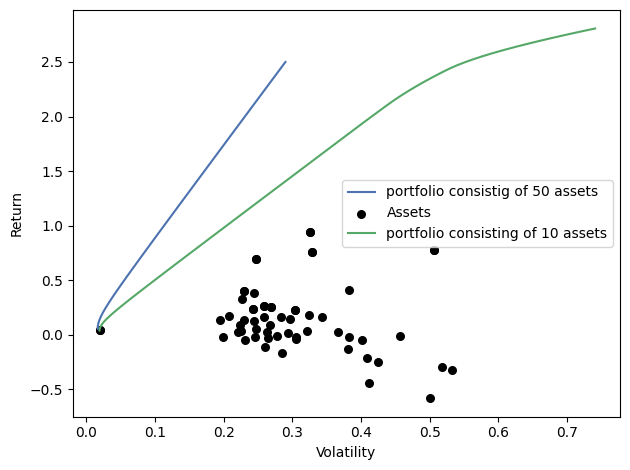

In [74]:
# Cтроим эффективный фронт портфелей из 50 активов (короткие продажи разрешены)
ef = EfficientFrontier(mu, Covv, weight_bounds=(-1, 1))
fig, ax = plt.subplots()
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 2.50, 100))

# Cтроим эффективный фронт портфелей из 10 активов (короткие продажи разрешены)
ef = EfficientFrontier(mu10, covv10, weight_bounds=(-1, 1))
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True)

plt.legend(['portfolio consistig of 50 assets', 'Assets', 'portfolio consisting of 10 assets'])
plt.show()

В случае разрешения коротких продаж, как и ожидалось, эффективный фронт портфелей для 10 активов лежит ниже эффективного фронта портфелей для 50 активов. Это верно, так как составить оптимальные портфели из 50 активов легче, чем выбирая только из 10 активов.

Найдем набор активов для портфелей с <b/>запретом</b> коротких продаж, для которых эффективный фронт портфелей инвестиций лежит наиболее близко к фронту портфелей для 50 активов.

In [75]:
optimal_search_not_allowed((0, 1))

Portfolio:  ('HEN3.DE', 'IFX.DE', 'SAP.DE', 'KTN.DE', 'WAF.DE', 'EUZ.DE', 'EVT.DE', 'LIN.DE', '1COV.DE', 'ADS.DE')
Minimal distance:  0.0015130132740941102


In [39]:
portfolio = ['HEN3.DE', 'IFX.DE', 'SAP.DE', 'KTN.DE', 'WAF.DE', 'EUZ.DE', 'EVT.DE', 'LIN.DE', '1COV.DE', 'ADS.DE']
returns10 = expected_returns.returns_from_prices(stock_data[portfolio], log_returns=True)
mu10 = expected_returns.mean_historical_return(returns10,  returns_data=True, frequency=255)
covv10 = risk_models.sample_cov(returns10, returns_data=True, frequency=255)

c:\Users\PCUserName\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.960
  warnings.warn(
c:\Users\PCUserName\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.985
  warnings.warn(
c:\Users\PCUserName\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\plotting.py:190: UserWarning: Could not construct portfolio for parameter value 1.010
  warnings.warn(
c:\Users\PCUserName\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\plotting.py:190: UserWarning: Could not construct portfolio for parameter value 1.035
  warnings.warn(
c:\Users\PCUserName\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\plotting.py:190: UserWarning: Could not construct portfolio for parameter value 1.061
  warnings.warn(
c:\Users\PCUserName\AppData\Local\Programs\Python\Pytho

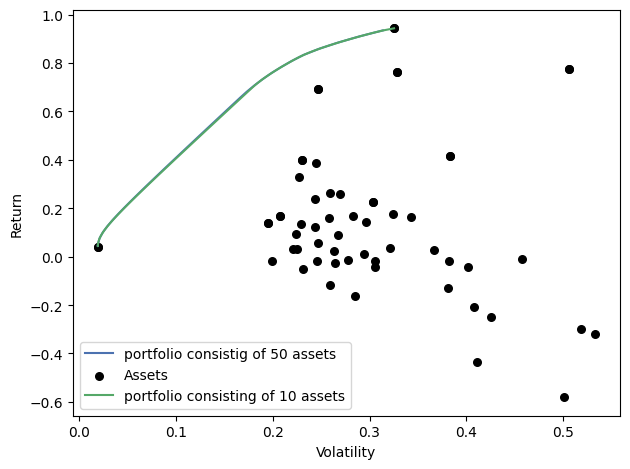

In [60]:
# Cтроим эффективный фронт портфелей из 50 активов (короткие продажи запрещены)
ef = EfficientFrontier(mu, Covv, weight_bounds=(0, 1))
fig, ax = plt.subplots()
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 2.50, 100))

# Cтроим эффективный фронт портфелей из 10 активов (короткие продажи запрещены)
ef = EfficientFrontier(mu10, covv10, weight_bounds=(0, 1))
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True,  ef_param_range=np.linspace(0.00, 2.50, 100))

plt.legend(['portfolio consistig of 50 assets', 'Assets', 'portfolio consisting of 10 assets'])
plt.show()

На графике видно, что в случае запрета коротких продаж эффективные фронты, построенные для 50 активов и для выбранных 10 активов, практически совпадают, что говорит о том, что даже имея 10 активов из предложенных 50 можно получить портфели инвестиций с близкими значениями доходностей при определенном риске к значениям портфелей, полученных для 50 активов.

## Оценка отношения к риску

Выбранное значение риска - 15%. При этом уровне мы сможем получить достаточную доходность, несмотря на риск.

С помощью функции efficient_risk построим портфель, который имеет максимальную доходность при заданном уровне риска.

#### Анализ портфеля с разрешением коротких продаж:

In [43]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(-1,1)) #инициализируем объект класса
sharpe_pfolio=ef.efficient_risk(0.15) #задаем размер риска
sharpe_pwt=ef.clean_weights() 
print(sharpe_pwt)

OrderedDict([('1COV.DE', 0.27775), ('ADS.DE', 0.3091), ('AIR.DE', -0.09673), ('AIXA.DE', -0.06204), ('ALV.DE', -0.02142), ('AOF.DE', -0.02735), ('BAS.DE', 0.38555), ('BAYN.DE', -0.3759), ('BC8.DE', 0.05335), ('BEI.DE', -0.10065), ('BMW.DE', -0.00278), ('BNR.DE', -0.09892), ('COK.DE', -0.09862), ('CON.DE', -0.15498), ('COP.DE', -0.07449), ('DB1.DE', -0.05789), ('DBK.DE', -0.07947), ('DTE.DE', -0.07778), ('EKT.DE', 0.03751), ('EOAN.DE', -0.13346), ('EUZ.DE', 0.21568), ('EVT.DE', 0.21583), ('FME.DE', 0.11812), ('FRE.DE', 0.00888), ('HEI.DE', -0.04339), ('HEN3.DE', 0.03521), ('HNR1.DE', -0.1109), ('IFX.DE', -0.09174), ('KTN.DE', -0.01632), ('LIN.DE', 0.46), ('MBG.DE', 0.09709), ('MRK.DE', -0.12498), ('MTX.DE', 0.17582), ('MUV2.DE', 0.15728), ('NDX1.DE', -0.1303), ('NEM.DE', 0.01062), ('PAH3.DE', 0.25441), ('PNE3.DE', 0.00705), ('PUM.DE', 0.03725), ('RWE.DE', 0.06073), ('S92.DE', -0.06681), ('SAP.DE', 0.26613), ('SIE.DE', 0.15475), ('SMHN.DE', -0.07233), ('SRT3.DE', 0.03195), ('SY1.DE', -0.

In [44]:
info_allowed = ef.portfolio_performance(verbose=True)
info_allowed #информация по портфелю

Expected annual return: 131.4%
Annual volatility: 15.0%
Sharpe Ratio: 8.63


(1.3138631627746864, 0.1500000001404133, 8.62575441042344)

В портфель входят все 50 акций. При этом 24 из них на позиции long sale и 26 на позиции short sale.

Самую большую положительную долю (0,46) имеет немецкая химическая компания Linde (LIN.DE). Это можно объяснить тем, что это самая стабильная акция из всех, у которой за год только 4 раза поменялась цена и каждый раз в большую сторону. Поэтому она и подходит для торговли в долгой позиции.

Самую большую отрицательную долю (0,37) имеет компания Bayer (BAYN.DE) - немецкая фармацевтическая компания. Значит ожидается, что цена этой компании упадет и будет возможность купить акции по более низкой цене.

**Оценка VaR:**

Зададим уровень отношения к риску: $\beta=0,85$.

In [45]:
#получаем список акций, у которых вес не ноль
assets = [key for key, value in sharpe_pwt.items() if value !=0]
print(assets)
weights = [value for value, value in sharpe_pwt.items() if value !=0]
print(weights)

['1COV.DE', 'ADS.DE', 'AIR.DE', 'AIXA.DE', 'ALV.DE', 'AOF.DE', 'BAS.DE', 'BAYN.DE', 'BC8.DE', 'BEI.DE', 'BMW.DE', 'BNR.DE', 'COK.DE', 'CON.DE', 'COP.DE', 'DB1.DE', 'DBK.DE', 'DTE.DE', 'EKT.DE', 'EOAN.DE', 'EUZ.DE', 'EVT.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 'HEN3.DE', 'HNR1.DE', 'IFX.DE', 'KTN.DE', 'LIN.DE', 'MBG.DE', 'MRK.DE', 'MTX.DE', 'MUV2.DE', 'NDX1.DE', 'NEM.DE', 'PAH3.DE', 'PNE3.DE', 'PUM.DE', 'RWE.DE', 'S92.DE', 'SAP.DE', 'SIE.DE', 'SMHN.DE', 'SRT3.DE', 'SY1.DE', 'VNA.DE', 'VOW3.DE', 'WAF.DE', 'ZAL.DE']
[0.27775, 0.3091, -0.09673, -0.06204, -0.02142, -0.02735, 0.38555, -0.3759, 0.05335, -0.10065, -0.00278, -0.09892, -0.09862, -0.15498, -0.07449, -0.05789, -0.07947, -0.07778, 0.03751, -0.13346, 0.21568, 0.21583, 0.11812, 0.00888, -0.04339, 0.03521, -0.1109, -0.09174, -0.01632, 0.46, 0.09709, -0.12498, 0.17582, 0.15728, -0.1303, 0.01062, 0.25441, 0.00705, 0.03725, 0.06073, -0.06681, 0.26613, 0.15475, -0.07233, 0.03195, -0.1241, 0.17879, -0.25214, 0.03079, -0.08415]


In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#функция для подсчета VaR
def VaR(returns, weights, beta=0.85, days=255):
    
    portfolio_returns = returns.iloc[-days:].dot(weights) #находим доходность портфеля по дням
    
    return np.percentile(portfolio_returns, 100 * (1-beta)) #выводим значение перцентиля при заданном уровне доверия

In [48]:
VaR(returns[assets],weights,beta=0.85,days=255) #полученное значение

-0.005679556626490562

**Оценка CVaR:**

In [49]:
#функция для подсчета CVaR
def CVaR(returns, weights, beta=0.85, days=255):
    
    var = VaR(returns, weights, beta, days=days)
    
    portfolio_returns = returns.iloc[-days:].dot(weights)
    
    return np.nanmean(portfolio_returns[portfolio_returns < var]) 

In [50]:
CVaR(returns,weights,beta=0.85,days=255) #полученное значение

-0.009492154385960572

Text(0, 0.5, 'Частота наблюдений')

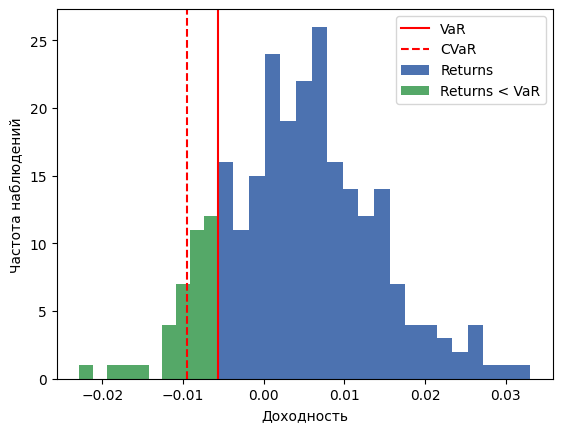

In [51]:
portfolio_returns = returns.iloc[-255:].dot(weights)

portfolio_VaR = VaR(returns, weights)
portfolio_CVaR = CVaR(returns, weights)

plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR], bins=10)
plt.axvline(portfolio_VaR, color='red', linestyle='solid')
plt.axvline(portfolio_CVaR, color='red', linestyle='dashed')
plt.legend(['VaR', 'CVaR', 'Returns', 'Returns < VaR'])
plt.xlabel('Доходность')
plt.ylabel('Частота наблюдений')

Таким образом, с вероятностью 85% мы потеряем не больше 0.57%, а в случае превышения этого значения наши потери составят не больше 0.94%.

**Изображение на графике:**

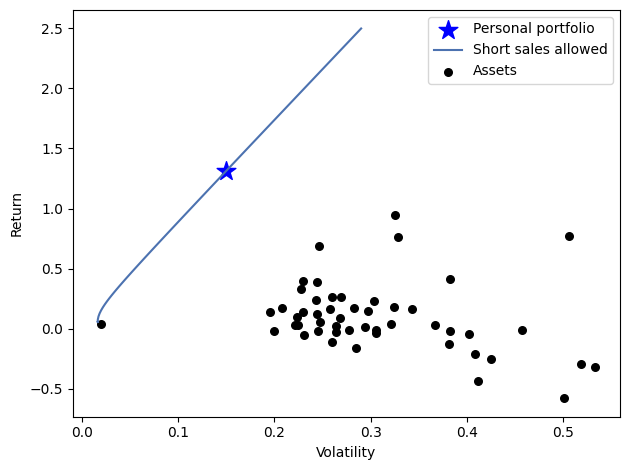

In [52]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(-1,1))
fig, ax = plt.subplots()
plt.scatter(info_allowed[1], info_allowed[0],c='blue', marker='*', s=200) #отмечаем наш портфель
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 2.50, 100)) #строим эффективный фронт
plt.legend(['Personal portfolio', 'Short sales allowed', 'Assets'])
plt.show()

#### Анализ портфеля с запретом коротких продаж:

In [53]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(0,1)) #инициализируем объект класса
sharpe_pfolio=ef.efficient_risk(0.15) #задаем риск
sharpe_pwt=ef.clean_weights() 
print(sharpe_pwt)

OrderedDict([('1COV.DE', 0.212), ('ADS.DE', 0.28081), ('AIR.DE', 0.0), ('AIXA.DE', 0.0), ('ALV.DE', 0.0), ('AOF.DE', 0.0), ('BAS.DE', 0.0), ('BAYN.DE', 0.0), ('BC8.DE', 0.0), ('BEI.DE', 0.0), ('BMW.DE', 0.0), ('BNR.DE', 0.0), ('COK.DE', 0.0), ('CON.DE', 0.0), ('COP.DE', 0.0), ('DB1.DE', 0.0), ('DBK.DE', 0.0), ('DTE.DE', 0.0), ('EKT.DE', 0.06958), ('EOAN.DE', 0.0), ('EUZ.DE', 0.20223), ('EVT.DE', 0.07695), ('FME.DE', 0.0), ('FRE.DE', 0.0), ('HEI.DE', 0.0), ('HEN3.DE', 0.0), ('HNR1.DE', 0.0), ('IFX.DE', 0.0), ('KTN.DE', 0.0), ('LIN.DE', 0.10808), ('MBG.DE', 0.0), ('MRK.DE', 0.0), ('MTX.DE', 0.0), ('MUV2.DE', 0.0), ('NDX1.DE', 0.0), ('NEM.DE', 0.0), ('PAH3.DE', 0.0), ('PNE3.DE', 0.0), ('PUM.DE', 0.0), ('RWE.DE', 0.0), ('S92.DE', 0.0), ('SAP.DE', 0.0), ('SIE.DE', 0.0), ('SMHN.DE', 0.0), ('SRT3.DE', 0.0), ('SY1.DE', 0.0), ('VNA.DE', 0.0), ('VOW3.DE', 0.0), ('WAF.DE', 0.05035), ('ZAL.DE', 0.0)])


In [54]:
info_not_allowed = ef.portfolio_performance(verbose=True)
info_not_allowed #информация по портфелю

Expected annual return: 59.5%
Annual volatility: 15.0%
Sharpe Ratio: 3.83


(0.5949444701386263, 0.15000000007818032, 3.83296313225976)

Всего в портфеле имеем 7 акций. 

При этом 6 из 7 являются компаниями из технологического сектора (компания нано и микро технологий, химические, фармацевтика).

Но самую большую долю (0,28) имеет Adidas (ADS.DE) - немецкая корпорация по производству одежды и обуви.

**Оценка VaR:**

In [55]:
#получаем список акций, у которых вес не ноль
assets = [key for key, value in sharpe_pwt.items() if value !=0]
print(assets)
weights = [value for value, value in sharpe_pwt.items() if value !=0]
print(weights)

['1COV.DE', 'ADS.DE', 'EKT.DE', 'EUZ.DE', 'EVT.DE', 'LIN.DE', 'WAF.DE']
[0.212, 0.28081, 0.06958, 0.20223, 0.07695, 0.10808, 0.05035]


Значения VaR для акций, входящих в портфель:

In [56]:
VaR(returns[assets],weights,beta=0.85,days=255)

-0.006727105233939936

**Оценка CVaR:**

In [57]:
CVaR(returns[assets],weights,beta=0.85,days=255)

-0.012632377916767013

Text(0, 0.5, 'Частота наблюдений')

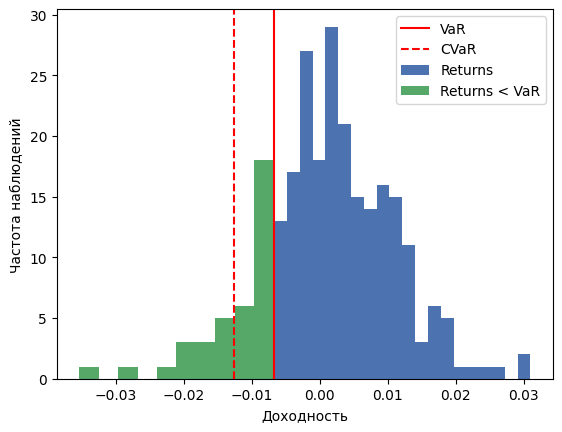

In [58]:
portfolio_returns = returns[assets].iloc[-255:].dot(weights)

portfolio_VaR = VaR(returns[assets], weights)
portfolio_CVaR = CVaR(returns[assets], weights)

plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR], bins=10)
plt.axvline(portfolio_VaR, color='red', linestyle='solid')
plt.axvline(portfolio_CVaR, color='red', linestyle='dashed')
plt.legend(['VaR', 'CVaR', 'Returns', 'Returns < VaR'])
plt.xlabel('Доходность')
plt.ylabel('Частота наблюдений')

Таким образом, с вероятностью 85% мы потеряем не более 0.67%, а в случае превышения этого значения, потери составят не более 1.26%.

**Изображение на графике:**

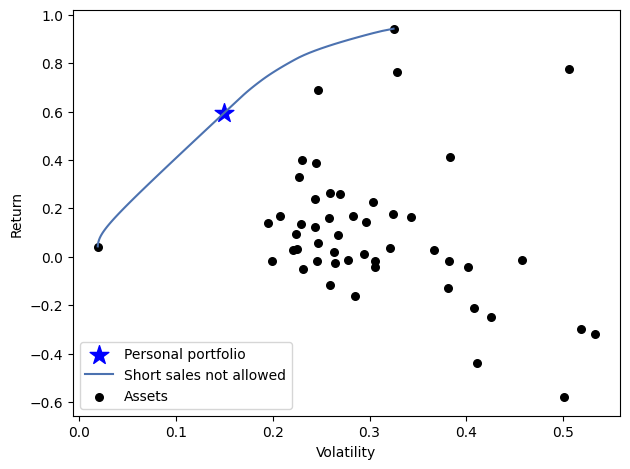

In [59]:
ef = EfficientFrontier(mu, Covv, weight_bounds=(0, 1))
fig, ax = plt.subplots()
plt.scatter(info_not_allowed[1], info_not_allowed[0],c='blue', marker='*', s=200) #отмечаем наш портфель
pplt.plot_efficient_frontier(ef, ax=ax, show_assets=True) #строим эффективный фронт
plt.legend(['Personal portfolio', 'Short sales not allowed', 'Assets'])
plt.show()